# Read data from CSV

In [1]:
import sys, os
from pathlib import Path
sys.path.append(str(Path("..")))
from scripts.read_data import read_data

os.makedirs("../generated_charts", exist_ok = True)

data = read_data()
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,6th choice,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 3rd Cycle,Other - 11th Year,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),2nd choice,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year or Eq.,Higher Ed - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,6th choice,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 1st Cycle (4th/5th),...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,3rd choice,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Ed 2nd Cycle (6th–8th),Basic Ed 1st Cycle (4th/5th),...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,2nd choice,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic Ed 1st Cycle (4th/5th),Basic Ed 2nd Cycle (6th–8th),...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

TYPE = "regression"

<Figure size 1000x700 with 0 Axes>

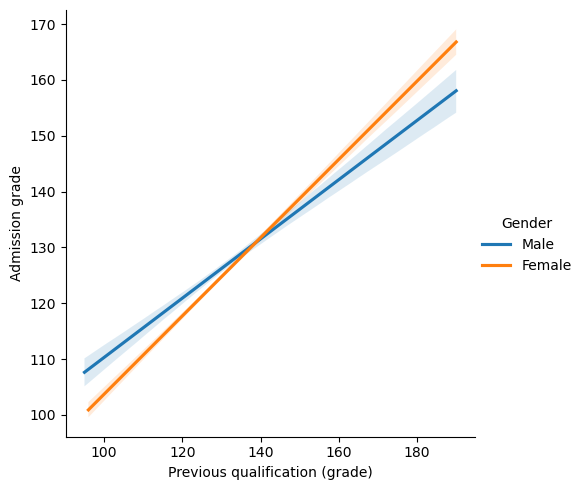

In [3]:
plt.figure(figsize = (10,7))
sns.lmplot(data = data, x="Previous qualification (grade)", y="Admission grade", hue = "Gender", scatter = False)
plt.savefig(f"../generated_charts/{TYPE}_admission_grade_vs_previous_qualification_data (gender).png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x700 with 0 Axes>

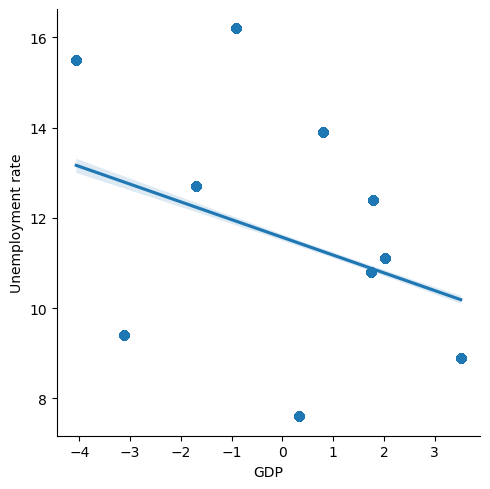

In [4]:
plt.figure(figsize = (10,7))
sns.lmplot(data = data, x="GDP", y="Unemployment rate")
plt.savefig(f"../generated_charts/{TYPE}_unemployment_vs_GDP.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x700 with 0 Axes>

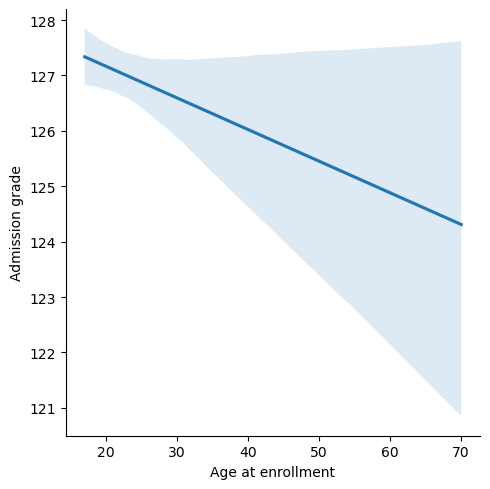

In [5]:
plt.figure(figsize = (10,7))
sns.lmplot(data = data, x="Age at enrollment", y="Admission grade", scatter = False)
plt.savefig(f"../generated_charts/{TYPE}_admission_grade_vs_age.png", dpi=300, bbox_inches='tight')
plt.show()

The older students are, the worse their admission grade is (however it might be influenced by less data for older students)

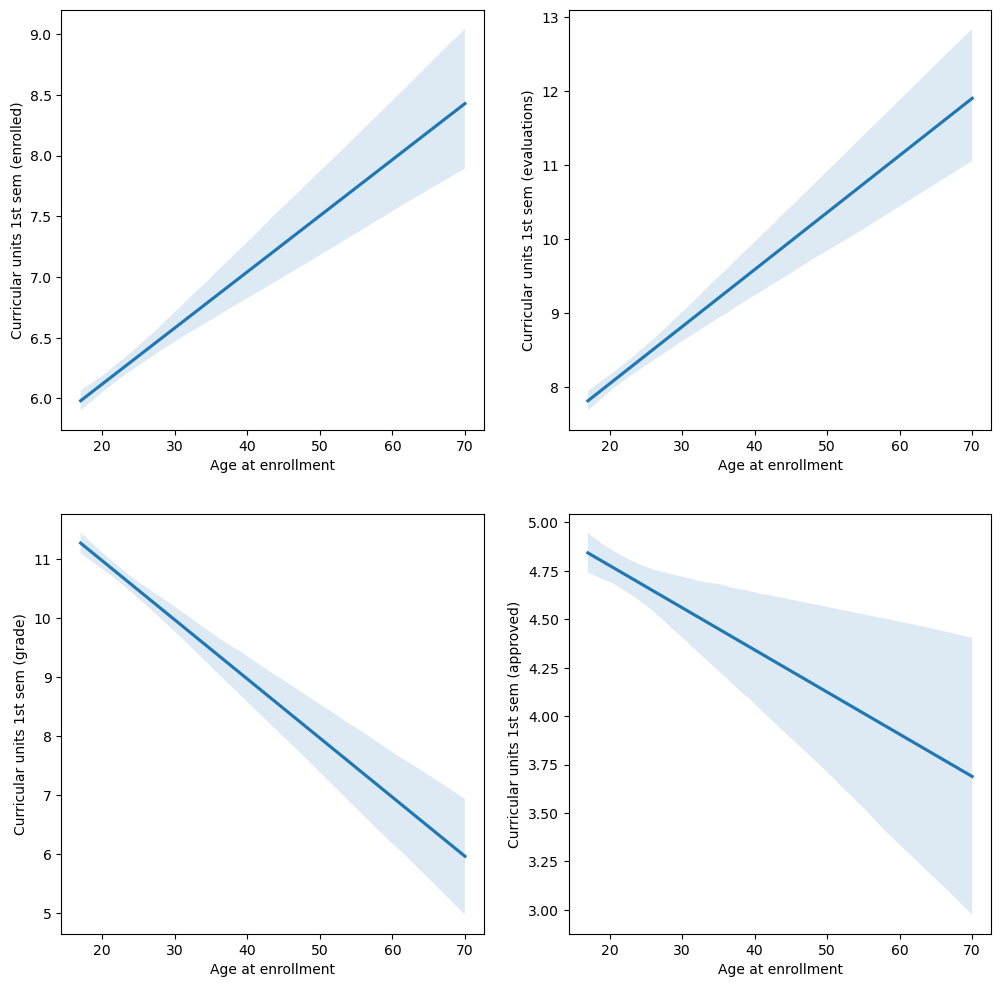

In [6]:
_, axs = plt.subplots(2, 2, figsize = (12,12))
sns.regplot(data = data, x="Age at enrollment", y="Curricular units 1st sem (grade)", ax = axs[1][0], scatter = False)
sns.regplot(data = data, x="Age at enrollment", y="Curricular units 1st sem (evaluations)", ax = axs[0][1], scatter = False)
sns.regplot(data = data, x="Age at enrollment", y="Curricular units 1st sem (enrolled)", ax = axs[0][0], scatter = False)
sns.regplot(data = data, x="Age at enrollment", y="Curricular units 1st sem (approved)", ax = axs[1][1], scatter = False)
plt.savefig(f"../generated_charts/{TYPE}_params_1st_vs_age.png", dpi=300, bbox_inches='tight')
plt.show()

older students enroll on more courses and take more evaluations but their perfomrance is much worse comparing to younger students

<Figure size 1200x700 with 0 Axes>

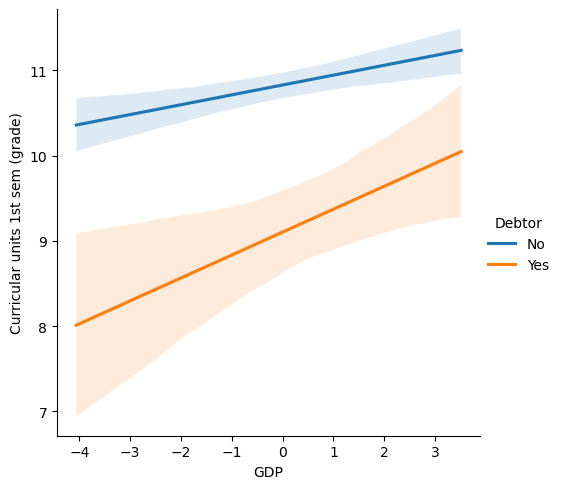

In [7]:
plt.figure(figsize = (12,7))
sns.lmplot(data = data, x = "GDP", y = "Curricular units 1st sem (grade)", hue = "Debtor", scatter = False)
plt.savefig(f"../generated_charts/{TYPE}_grade_1st_vs_GDP (debtor).png", dpi=300, bbox_inches='tight')
plt.show()

* If GDP increases students get better grades
* It's more correlated for debtors

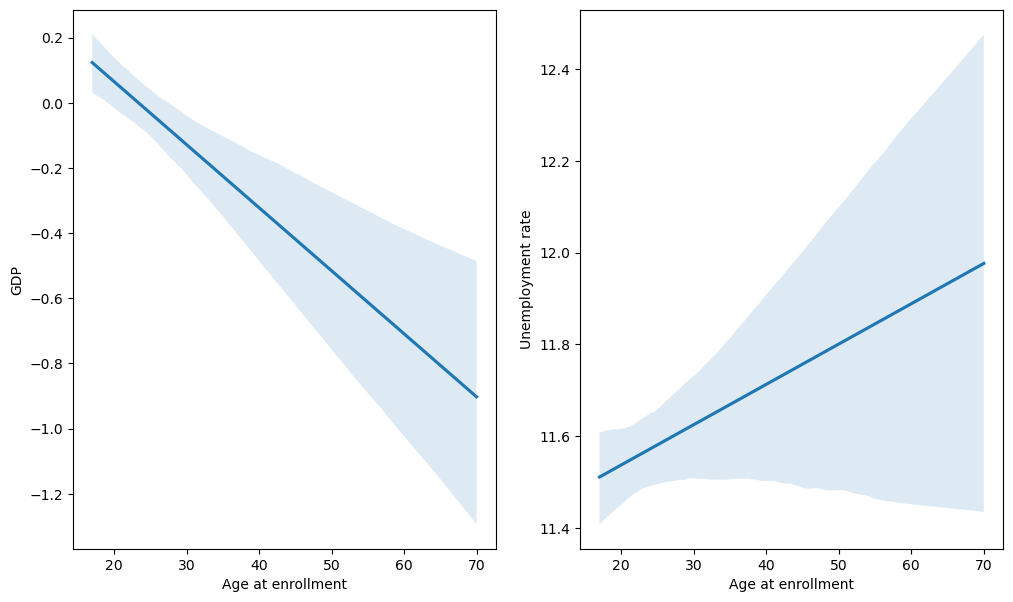

In [8]:
_, axs = plt.subplots(1, 2, figsize = (12,7))
sns.regplot(data = data, x = "Age at enrollment", y = "GDP", ax = axs[0], scatter = False)
sns.regplot(data = data, x = "Age at enrollment", y = "Unemployment rate", ax = axs[1], scatter = False)
plt.savefig(f"../generated_charts/{TYPE}_GDP_and_unemployment_vs_age.png", dpi=300, bbox_inches='tight')
plt.show()

Older students tend to enroll more frequently if GDP decreases and there are higher unemployment rates